In [1]:
from dtumathtools import *
import matplotlib.pyplot as plt
from sympy import*
import numpy as np
import scipy.stats as st
import pandas as pd

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
GH2O = -472.453894086
GH2 = -32.0477894152
# Ag, Au, Cu, Ir, Pd, Pt, Rh
G_O = np.array([-109052.323869, -42697.2813759, -148790.894532, -67218.558931, -73443.2806896, -77847.8829633, -63331.5970043])
G_OH = np.array([-109068.917494, -42714.0311244, -148806.664749, -67233.9976047, -73459.0528061, -77863.8780757, -63346.9188773])
G_metal = np.array([-108614.025188, -42259.3225288, -148351.351357, -66778.9524593, -73004.2026982, -77408.7496088, -62891.8951848])
absorption_energy = G_OH - G_metal - (GH2O-0.5*GH2)
absorption_energy_O = G_O - G_metal - (GH2O-0.5*GH2)

In [4]:
G_HOOH = np.array([-109522.444245, -43167.3830629, -149259.860551, -67687.6709108, -73912.7675732, -78317.2165186, -63800.6694956])
G_H2O2 = np.array([-109523.416333, -43168.7133265,-149260.675925, -67688.3463479, -73913.6008804, -78318.2061714, -63801.418164])
activation_energy = G_HOOH - G_H2O2

In [5]:
activation_energy

array([0.972088 , 1.3302636, 0.815374 , 0.6754371, 0.8333072, 0.9896528,
       0.7486684])

In [6]:
slope, intercept, r_value, p_value, std_err = st.linregress(absorption_energy, activation_energy)


/tmp/ipykernel_6913/814191675.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, slope * x + intercept, 'b+', color='blue', label='Regression line')


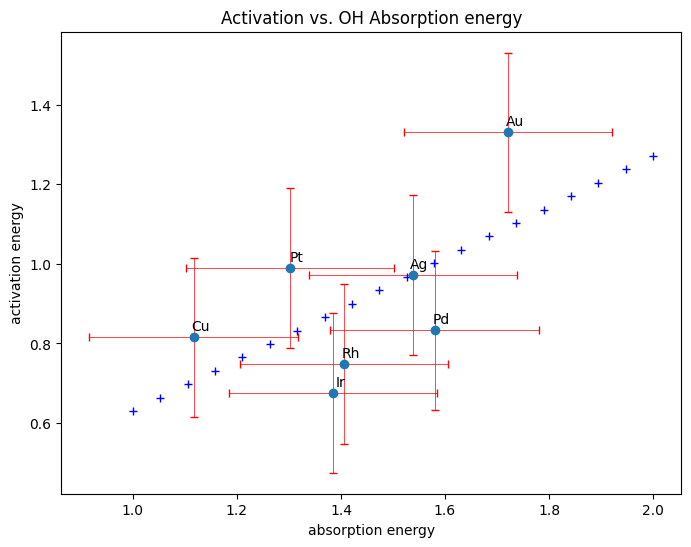

In [7]:
plt.figure(figsize=(8, 6))
y_err = 0.2
x = np.linspace(1, 2, 20)

# Scatter plot with error bars
plt.errorbar(absorption_energy, activation_energy, xerr=y_err, yerr=y_err, fmt='o', ecolor='red', capsize=3, capthick=1, elinewidth=0.5)
plt.xlabel('absorption energy')
plt.ylabel('activation energy')
plt.title('Activation vs. OH Absorption energy')

labels = ["Ag", "Au", "Cu", "Ir", "Pd", "Pt", "Rh"]
for xi, yi, label in zip(absorption_energy, activation_energy, labels):
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(5,5), ha='center')
    
plt.plot(x, slope * x + intercept, 'b+', color='blue', label='Regression line')

# Display the plot
plt.show()

In [8]:
display(slope, intercept)
print(f"Ga = {slope} * dG(OH) + {intercept}")

0.6417884010882307

-0.012012064981820947

Ga = 0.6417884010882307 * dG(OH) + -0.012012064981820947


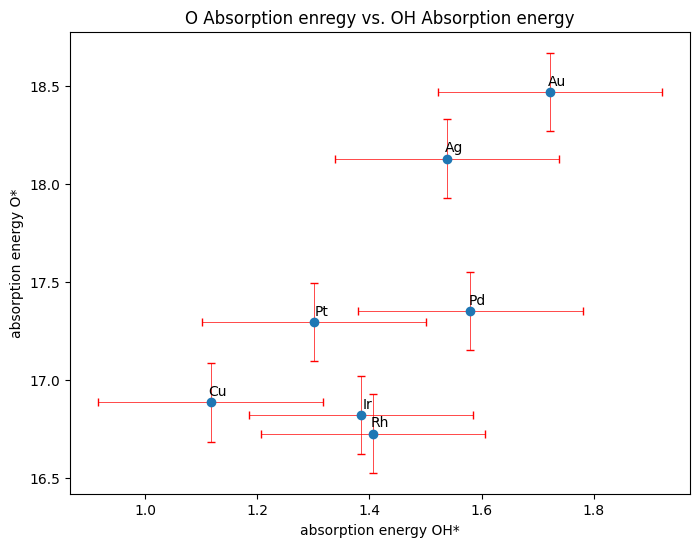

In [9]:
plt.figure(figsize=(8, 6))
y_err = 0.2
x = np.linspace(1, 2, 20)

# Scatter plot with error bars
plt.errorbar(absorption_energy, absorption_energy_O, xerr=y_err,yerr=y_err, fmt='o', ecolor='red', capsize=3, capthick=1, elinewidth=0.5)
plt.xlabel('absorption energy OH*')
plt.ylabel('absorption energy O*')
plt.title('O Absorption enregy vs. OH Absorption energy')

labels = ["Ag", "Au", "Cu", "Ir", "Pd", "Pt", "Rh"]
for xi, yi, label in zip(absorption_energy, absorption_energy_O, labels):
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(5,5), ha='center')
    
#plt.plot(x, slope * x + intercept, 'b+', color='blue', label='Regression line')

# Display the plot
plt.show()

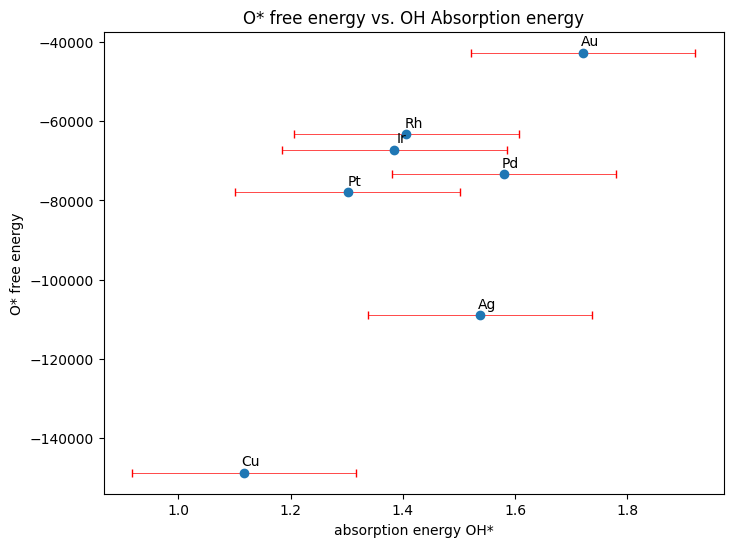

In [10]:
plt.figure(figsize=(8, 6))
y_err = 0.2
x = np.linspace(1, 2, 20)

# Scatter plot with error bars
plt.errorbar(absorption_energy, G_O, xerr=y_err,yerr=y_err, fmt='o', ecolor='red', capsize=3, capthick=1, elinewidth=0.5)
plt.xlabel('absorption energy OH*')
plt.ylabel('O* free energy')
plt.title('O* free energy vs. OH Absorption energy')

labels = ["Ag", "Au", "Cu", "Ir", "Pd", "Pt", "Rh"]
for xi, yi, label in zip(absorption_energy, G_O, labels):
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(5,5), ha='center')
    
#plt.plot(x, slope * x + intercept, 'b+', color='blue', label='Regression line')

# Display the plot
plt.show()

In [11]:
from scipy.integrate import quad
import pandas as pd

In [12]:
# Read the CSV file into a DataFrame
metals = ["Ag", "Au", "Cu", "Ir", "Pd", "Pt", "Rh"]
Ed = []
for metal in metals:
    filename = f'{metal}_dos.csv'
    df = pd.read_csv(filename)
    df['x_y'] = df['Energy'] * df['PDOS on D-band']
    numerator = np.trapz(df['x_y'], df['Energy'])
    denomerator = np.trapz(df['PDOS on D-band'],df['Energy'])
    Ed.append(numerator/denomerator)
# Display the first few rows of the DataFrame
Ed

[-3.8288853680782418,
 -3.1823352354473666,
 -2.2359299308450633,
 -2.5458985036317396,
 -1.664584513866086,
 -2.1472869424824483,
 -1.963727218482278]

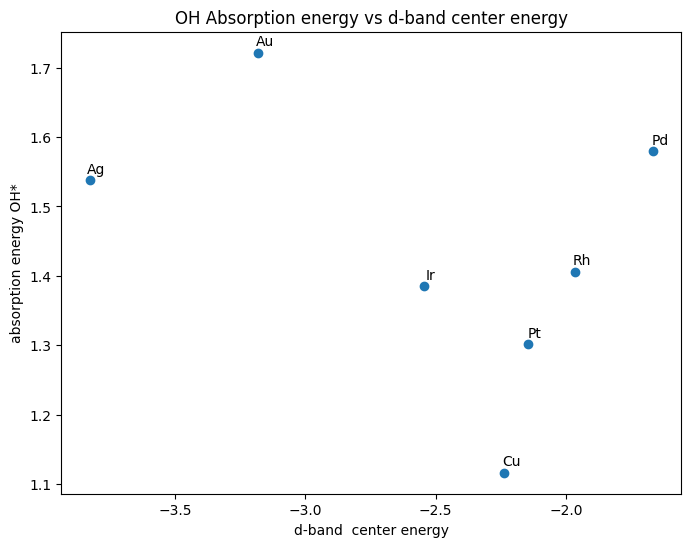

In [25]:
plt.figure(figsize=(8, 6))
y_err = 0.2
x = np.linspace(1, 2, 20)

# Scatter plot with error bars
plt.scatter(Ed, absorption_energy)
plt.xlabel('d-band  center energy')
plt.ylabel('absorption energy OH*')
plt.title('OH Absorption energy vs d-band center energy')

labels = ["Ag", "Au", "Cu", "Ir", "Pd", "Pt", "Rh"]
for xi, yi, label in zip(Ed, absorption_energy, labels):
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(5,5), ha='center')
    
#plt.plot(x, slope * x + intercept, 'b+', color='blue', label='Regression line')

# Display the plot
plt.show()

In [26]:
stats = 0

In [27]:
activities = pd.read_csv('activities.csv')
stats = pd.DataFrame(columns=['Metal', 'Mean Activity', 'sd'])
for metal in metals:
    # Filter the DataFrame for rows where 'Element' matches the current metal
    filtered = activities[activities['Element'] == metal]
    
    if not filtered.empty:
        mean_activity = filtered['Activity'].mean()
        mean_sd = filtered['Activity'].std()
        stats_df = pd.DataFrame({'Metal':[metal], 'Mean Activity':[mean_activity], 'sd':[mean_sd]})
        stats = pd.concat([stats,stats_df],axis=0)

stats

/tmp/ipykernel_6913/516919772.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats = pd.concat([stats,stats_df],axis=0)


,Metal,Mean Activity,sd
0,Ag,0.016842,0.009582
0,Au,0.009630,0.009982
0,Cu,0.001212,0.000716
0,Ir,0.030901,0.009187
0,Pd,0.093349,0.126398
0,Pt,0.008159,0.009338
0,Rh,0.009137,0.008638


In [28]:
mu, mu_ag, sd, sd_ag = symbols("mu, mu_ag, sd, sd_ag")

def err(x, y, z, m):
    x=float(x)
    y=float(y)
    z=float(z)
    m=float(m)
    er = sqrt((diff(log(mu/mu_ag,10),mu)*sd)**2 + (diff(log(mu/mu_ag,10), mu_ag)*sd)**2)
    return er.subs({mu: x, mu_ag: y, sd:z, sd_ag:m}).evalf()
err(0.016842, 0.016842, 0.009582, 0.009582)

0.349431307002168

In [29]:
dG_OH = absorption_energy
dG_OH = np.hstack((dG_OH, np.array([2.13, -0.35, 1.56, 3.66, 1.02])))
dG_OH

array([ 1.53769338,  1.72140378,  1.11660738,  1.38485398,  1.57989148,
        1.30153248,  1.40630688,  2.13      , -0.35      ,  1.56      ,
        3.66      ,  1.02      ])

In [30]:
df = pd.DataFrame({'Metal':['MnO2', 'MoO', 'PtO2','TiO2', 'SnO2'], 'Normalized Activity':[-4.529053099, -37.96718733, 0.035300735, -17.03876965,
                                                                                    -4.326447279]})

reference_rate = stats.loc[stats['Metal'] == 'Ag', 'Mean Activity'].values[0]
stats['Normalized Activity'] = stats['Mean Activity'].apply(lambda x: log(x/reference_rate, 10))
# Reference values for Ag
mu_ag_val = stats.loc[stats['Metal'] == 'Ag', 'Mean Activity'].values[0]
sd_ag_val = stats.loc[stats['Metal'] == 'Ag', 'sd'].values[0]

# Function to apply to each row
def calculate_error(row):
    return err(row['Mean Activity'], mu_ag_val, row['sd'], sd_ag_val)

# Apply the function to each row
stats['Normalized sd'] = stats.apply(calculate_error, axis=1)

df = pd.DataFrame({'Metal':['MnO2', 'MoO', 'PtO2','TiO2', 'SnO2'], 'Normalized Activity':[-4.529053099, -37.96718733, 0.035300735, -17.03876965,
                                                                                          -4.326447279]})
stats = pd.concat([stats,df],axis=0)


In [31]:
def f(x):
    return -7.11*x**2 + 27.88*x - 25.62

/tmp/ipykernel_6913/411245196.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, f(x), 'b+', color='red', label='Regression line')


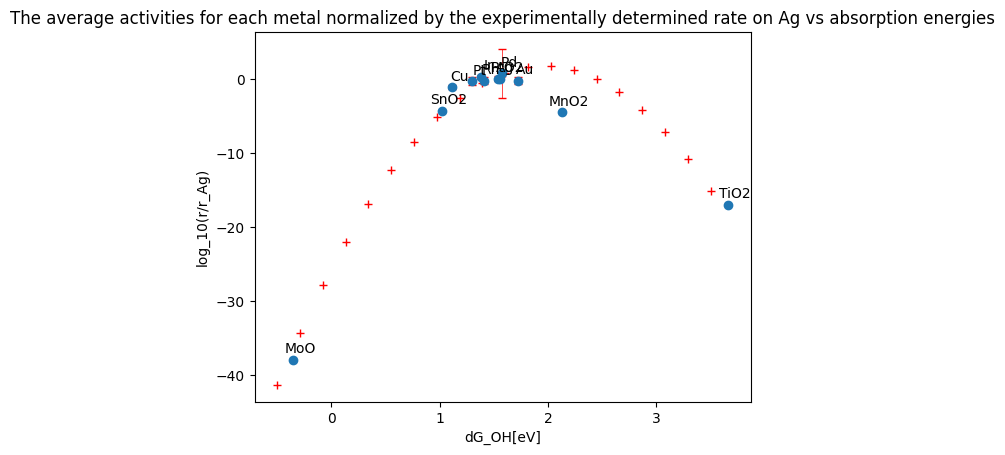

In [32]:
x = np.linspace(-0.5, 3.5, 20)

plt.errorbar(dG_OH, stats['Normalized Activity'], yerr=stats['Normalized sd'], fmt='o', ecolor='red', capsize=3, capthick=1, elinewidth=0.5)

for xi, yi, label in zip(dG_OH, stats['Normalized Activity'], stats['Metal']):
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(5,5), ha='center')

plt.plot(x, f(x), 'b+', color='red', label='Regression line')   

plt.xlabel('dG_OH[eV]')
plt.ylabel('log_10(r/r_Ag)')
plt.title('The average activities for each metal normalized by the experimentally determined rate on Ag vs absorption energies')

plt.show()

/tmp/ipykernel_6913/3664722354.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, f(x), 'b+', color='red', label='Regression line')


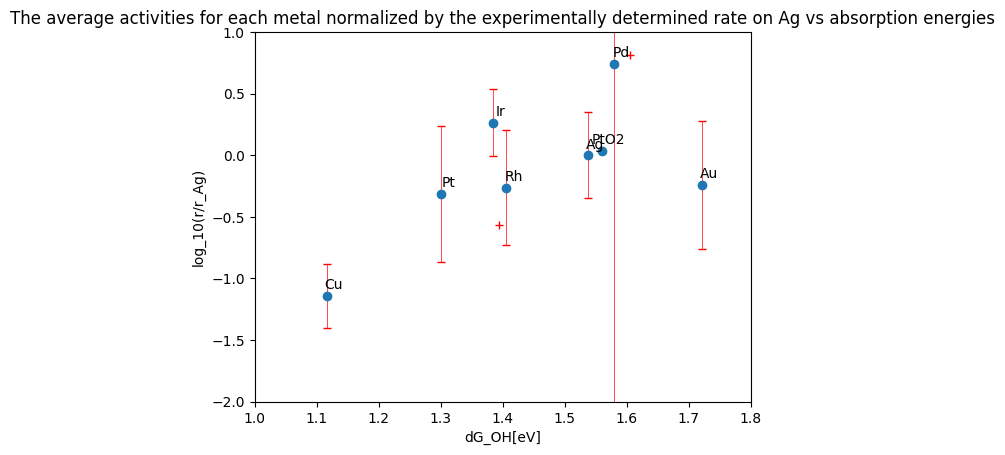

In [33]:
plt.errorbar(dG_OH, stats['Normalized Activity'], yerr=stats['Normalized sd'], fmt='o', ecolor='red', capsize=3, capthick=1, elinewidth=0.5)

for xi, yi, label in zip(dG_OH, stats['Normalized Activity'], stats['Metal']):
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(5,5), ha='center')
plt.plot(x, f(x), 'b+', color='red', label='Regression line')   
plt.xlabel('dG_OH[eV]')
plt.ylabel('log_10(r/r_Ag)')
plt.title('The average activities for each metal normalized by the experimentally determined rate on Ag vs absorption energies')
plt.xlim(1, 1.8)  # Zooming in on the x-axis from 2 to 4
plt.ylim(-2, 1)  # Zooming in on the y-axis from 2 to 8
plt.show()


In [34]:
def f(x):
    return -7.11x**2 + 27.88*x - 25.62

SyntaxError: invalid decimal literal (3244057287.py, line 2)

In [35]:
stats
# Ag, Au, Cu, Ir, Pd, Pt, Rh

,Metal,Mean Activity,sd,Normalized Activity,Normalized sd
0,Ag,0.016842,0.009582,0,0.349437066775993
0,Au,0.009630,0.009982,-0.559026924847838/log(10),0.518572509908304
0,Cu,0.001212,0.000716,-2.63170992832518/log(10),0.257350309711797
0,Ir,0.030901,0.009187,0.60693343012304/log(10),0.269789026744241
0,Pd,0.093349,0.126398,1.71248367384864/log(10),3.31200214905960
0,Pt,0.008159,0.009338,-0.724725361167453/log(10),0.552325766934969
0,Rh,0.009137,0.008638,-0.611489586387843/log(10),0.467102795515422
0,MnO2,NaN,NaN,-4.529053,NaN
1,MoO,NaN,NaN,-37.967187,NaN
2,PtO2,NaN,NaN,0.035301,NaN


In [36]:
decomposition_df=0

In [37]:
decomposition_df = pd.DataFrame({'Material':['MoO2', 'MnO2', 'TiO2'],
                                 'OH bind':[-0.64, 1.9, 3.6], 
                                 'Specific Area':[0.169, 0.887, 2.321],
                                 'Mass':[0.682, 0.132, 0.527],
                                 'Area':[0.1153, 0.1171, 1.2232], 
                                 'Oxygen evol rate': [0.0575, 0.7603, 0.005], 
                                 'Catal activity': [0.0000207, 0.0002899, 1.825 * 10**(-7)]})

In [38]:
decomposition_df

,Material,OH bind,Specific Area,Mass,Area,Oxygen evol rate,Catal activity
0,MoO2,-0.64,0.169,0.682,0.1153,0.0575,2.070000e-05
1,MnO2,1.90,0.887,0.132,0.1171,0.7603,2.899000e-04
2,TiO2,3.60,2.321,0.527,1.2232,0.0050,1.825000e-07


In [38]:
h_p = 6.62607015*10**(-34) #J*s
k_b = 1.380649*10**(-23) #J/K
G_f = -228.59*0.01036410 #eV
G_a = 0.06 #eV

In [ ]:
k_B, T, h = symbols('k_B, T, h')
Ga, Gf, delta_G_OH_star = symbols('Ga, Gf, delta_G_OH_star')
p_O2 = symbols('p_O2')
c_H2O2 = symbols('c_H2O2')
# Construct the expression
exp_part = exp(-(Ga / (k_B * T)))
sqrt_part = sqrt(p_O2**0.5 / exp((Gf + 2 * delta_G_OH_star) / (k_B * T)))
denominator = 1 + sqrt_part
fraction_part = 1 / denominator

r1 = (k_B * T / h) * exp_part * c_H2O2 * (fraction_part**2)
r1 = r1.subs({'k_B': k_b, 'T': 293, 'h':h_p, 'Ga':G_a, 'Gf':G_f, 'p_O2':1, 'c_H2O2':0.881})
dG_OH_star = solve((r1- 0.0000207),delta_G_OH_star)

In [39]:
bind_energy = dict(zip(["Ag", "Au", "Cu", "Ir", "Pd", "Pt", "Rh", "Ni"],absorption_energy))
bind_energy['Ni'] = 0.86
bind_energy

{'Ag': 1.53769337840572,
 'Au': 1.721403778406284,
 'Cu': 1.1166073784181663,
 'Ir': 1.3848539784005425,
 'Pd': 1.5798914784020326,
 'Pt': 1.3015324783984852,
 'Rh': 1.406306878400983,
 'Ni': 0.86}

In [40]:
decompos = pd.read_csv('decomposition.csv')
metals = ["Rh","Cu","Pd","Ni"]
working_df = pd.DataFrame()
vol = 22.4*10**3
for metal in metals:
    # Filter the DataFrame for rows where 'Element' matches the current metal
    element_data = decompos[decompos['Metal'] == metal]
    
    if not element_data.empty:
        vol = 22.4*10**3
        slope, intercept, r_value, p_value, std_err = st.linregress(element_data['time'], element_data['Volume,ml'])
        if metal == 'Ni':
            area = 0.000449552
        else:
            area = element_data['Area, m2'].dropna().iloc[0]
        activity = slope/area/vol
        working_df = pd.DataFrame({'Material':[metal],
                                 'OH bind':[bind_energy[metal]], 
                                 'Specific Area':[None],
                                 'Mass':[None],
                                 'Area':[area], 
                                 'Oxygen evol rate': [slope], 
                                 'Catal activity': [activity],
                                  'Intercept': [intercept]})
        decomposition_df = pd.concat((decomposition_df, working_df),ignore_index=True)

/tmp/ipykernel_6913/2494907817.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  decomposition_df = pd.concat((decomposition_df, working_df),ignore_index=True)


In [41]:
std_err

4.885558431057121e-05

In [52]:
decomposition_df

,Material,OH bind,Specific Area,Mass,Area,Oxygen evol rate,Catal activity,Intercept
0,MoO2,-0.640000,0.169,0.682,0.115300,0.057500,2.070000e-05,NaN
1,MnO2,1.900000,0.887,0.132,0.117100,0.760300,2.899000e-04,NaN
2,TiO2,3.600000,2.321,0.527,1.223200,0.005000,1.825000e-07,NaN
3,Rh,1.406307,NaN,NaN,0.000077,0.006533,3.770051e-03,-0.032870
4,Cu,1.116607,NaN,NaN,0.000614,0.004791,3.484366e-04,0.286822
5,Pd,1.579891,NaN,NaN,0.000071,0.010840,6.834842e-03,-0.097933
6,Ni,0.860000,NaN,NaN,0.403047,0.011589,1.283591e-06,-0.083362


In [47]:
decomposition_df[decomposition_df['Material'] == 'Ni']['Oxygen evol rate']

6    1.011589
Name: Oxygen evol rate, dtype: float64

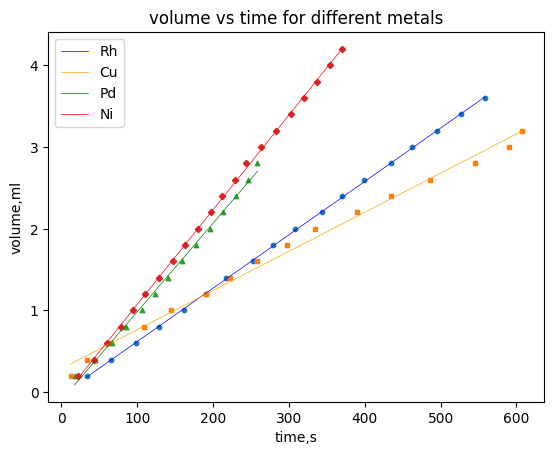

In [46]:
markers = ['o', 's', '^', 'D']
colors = ['blue','orange','green','red']
x = np.linspace(0, 600, 20)
plt.figure()
for index, metal in enumerate(metals):
    element_data = decompos[decompos['Metal'] == metal]
    
    if not element_data.empty:
        work_element = decomposition_df[decomposition_df['Material'] == metal]
        plt.scatter(element_data['time'], element_data['Volume,ml'], marker=markers[index],s=10)
        plt.plot(element_data['time'], work_element['Oxygen evol rate'].iloc[0] * element_data['time'] + work_element['Intercept'].iloc[0],
                 color=colors[index], linewidth=0.5, label=metals[index]) 
plt.xlabel('time,s')
plt.ylabel('volume,ml')
plt.title('volume vs time for different metals')
plt.legend()
plt.show()

In [47]:
decomposition_df

,Material,OH bind,Specific Area,Mass,Area,Oxygen evol rate,Catal activity,Intercept
0,MoO2,-0.640000,0.169,0.682,0.115300,0.057500,2.070000e-05,NaN
1,MnO2,1.900000,0.887,0.132,0.117100,0.760300,2.899000e-04,NaN
2,TiO2,3.600000,2.321,0.527,1.223200,0.005000,1.825000e-07,NaN
3,Rh,1.406307,NaN,NaN,0.000077,0.006533,3.770051e-03,-0.032870
4,Cu,1.116607,NaN,NaN,0.000614,0.004791,3.484366e-04,0.286822
5,Pd,1.579891,NaN,NaN,0.000071,0.010840,6.834842e-03,-0.097933
6,Ni,0.860000,NaN,NaN,0.000450,0.011589,1.150805e-03,-0.083362


In [48]:
mat1 = ['Pd','Rh','Cu','MoO2','Ni']
mat2 = ['Pd','Rh','MnO2','TiO2']

y1 = np.log10(decomposition_df[decomposition_df['Material'].isin(mat1)]['Catal activity'])
x1 = decomposition_df[decomposition_df['Material'].isin(mat1)]['OH bind']

# Extracting data for mat2
y2 = np.log10(decomposition_df[decomposition_df['Material'].isin(mat2)]['Catal activity'])
x2 = decomposition_df[decomposition_df['Material'].isin(mat2)]['OH bind']

slope1, intercept1, _, _, _ = st.linregress(x1,y1)
slope2, intercept2, _, _, _ = st.linregress(x2,y2)

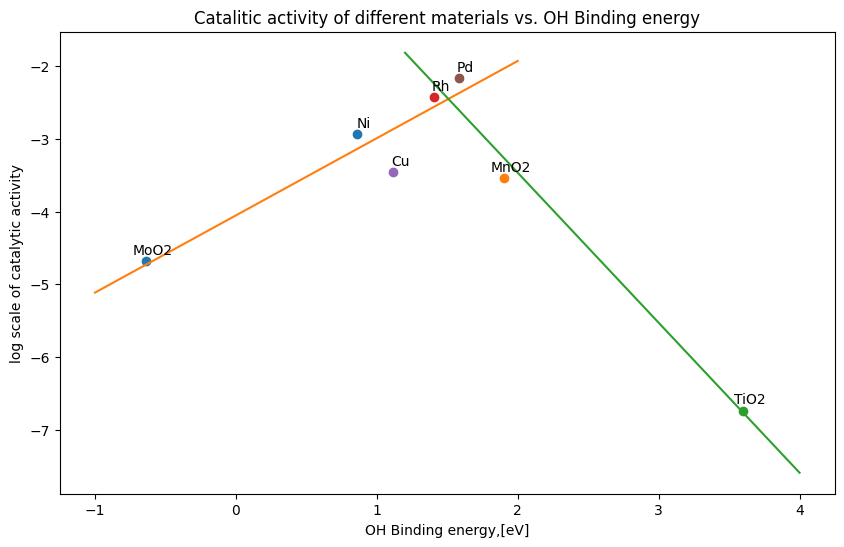

In [49]:
plt.figure(figsize=(10, 6))
x1_range = np.linspace(-1,2,4)
x2_range = np.linspace(1.2,4,4)
for i in range(len(decomposition_df)):
    xi = decomposition_df['OH bind'].iloc[i]
    yi = np.log10(decomposition_df['Catal activity'].iloc[i])
    label = decomposition_df['Material'].iloc[i]
    if label == 'Ni':
        plt.errorbar(xi, yi, yerr=0.00955806066592357, fmt='o', ecolor='red', capsize=3, capthick=1, elinewidth=0.5)
    else:
        plt.scatter(xi, yi)
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(5,5), ha='center')
plt.plot(x1_range, slope1*x1_range+intercept1)
plt.plot(x2_range, slope2*x2_range + intercept2)
plt.xlabel('OH Binding energy,[eV]')
plt.ylabel('log scale of catalytic activity')
plt.title('Catalitic activity of different materials vs. OH Binding energy')
plt.show()

### ERRORS

In [17]:
sig_cal = 0.5 * 10**(-3)  #m
sig_micr = 1 * 10**(-6)   #m
sig_vol = 0.2    #ml

In [20]:
v, d,h, A = symbols('v, d,h, A')

def activity(v,d,h):
    return log(v/(pi*(d*h+d**2/2))/(22.4*10**(3)),10)
act = activity(v,d,h)

In [21]:
act

log(4.46428571428571e-5*v/(pi*(d**2/2 + d*h)))/log(10)

In [42]:
h_m = 49*10**(-3)
d_m = 500 * 10**(-6)
slope = 0.006533
sig_cal = 1 * 10**(-3)  #m
sig_micr = 2 * 10**(-6)   #m
SE = std_err

In [43]:
SE

4.885558431057121e-05

In [44]:
d_func = sqrt((diff(act, d)*sig_micr)**2 + (diff(act, h)* sig_cal)**2 + (diff(act, v) * SE)**2)
print(d_func.subs({d:d_m, h:h_m, v:slope}).evalf())

0.00955806066592357


In [45]:
d_func

0.001*sqrt(d**2/((d**2/2 + d*h)**2*log(10)**2) + 4.0e-6*(-d - h)**2/((d**2/2 + d*h)**2*log(10)**2) + 0.00238686811832733/(v**2*log(10)**2))

$f = log(\frac{slope}{\pi(dh+d^2/2)\cdot 22.4 \cdot 10^3})$

$df = \sqrt{(\frac{\partial{f}}{\partial{d}} \cdot \Delta d)^2 + (\frac{\partial{f}}{\partial{h}} \cdot \Delta h)^2  + 
(\frac{\partial{f}}{\partial{slope}} \cdot SE)^2 } = \sqrt{(-\frac{(d+h)}{(d^2/2+dh)\ln(10)} \cdot \Delta d)^2 + (-\frac{d}{(d^2/2+dh)\ln(10)} \cdot \Delta h)^2  + (\frac{1}{slope \cdot \ln(10)} \cdot SE)^2 } $